# 3.51 極座標動畫

In [2]:
%matplotlib nbagg

## RLC交流電路頻率響應

<img align="center" style="padding-right:10px;" src="figures\RLC_Circuit.png">

$\omega = 2 \pi f$   
$e(t)=\sqrt{2}E\sin(\omega t + \theta_E)$  
$\vec{E} = E \angle \theta_E $  

$\vec{X_L}=X_L\angle \theta_L, X_L = \omega L, \theta_L = 90°$  
$\vec{X_C}=X_C\angle \theta_C, X_C = \cfrac{1}{\omega C}, \theta_C = -90°$  
$\vec{X} = \vec{X_L} - \vec{X_C} =X\angle \pm 90°$  
$\vec{Z} = Z \angle \theta_Z,  Z=\sqrt{R^2 + X^2}, \theta_L = \arctan \cfrac{X}{R}$  
$\vec{I} = \cfrac{\vec{E}}{\vec{Z}} = I \angle \theta_I, I = \cfrac{E}{Z}, \theta_I = \theta_E - \theta_Z$  
$\vec{V_R} =\vec{I} R =  V_R \angle \theta_{V_R}, V_R = IR, \theta_{V_R} = \theta_I$  
$\vec{V_L} =\vec{I} \vec{X_L} = V_L \angle \theta_{V_L}, V_L = IX_L , \theta_{V_L} = \theta_I + 90°$  
$\vec{V_C} =\vec{I} \vec{X_C} = V_C \angle \theta_{V_C}, V_C = IX_C , \theta_{V_C} = \theta_I - 90°$


1591.5494309189535


<IPython.core.display.Javascript object>


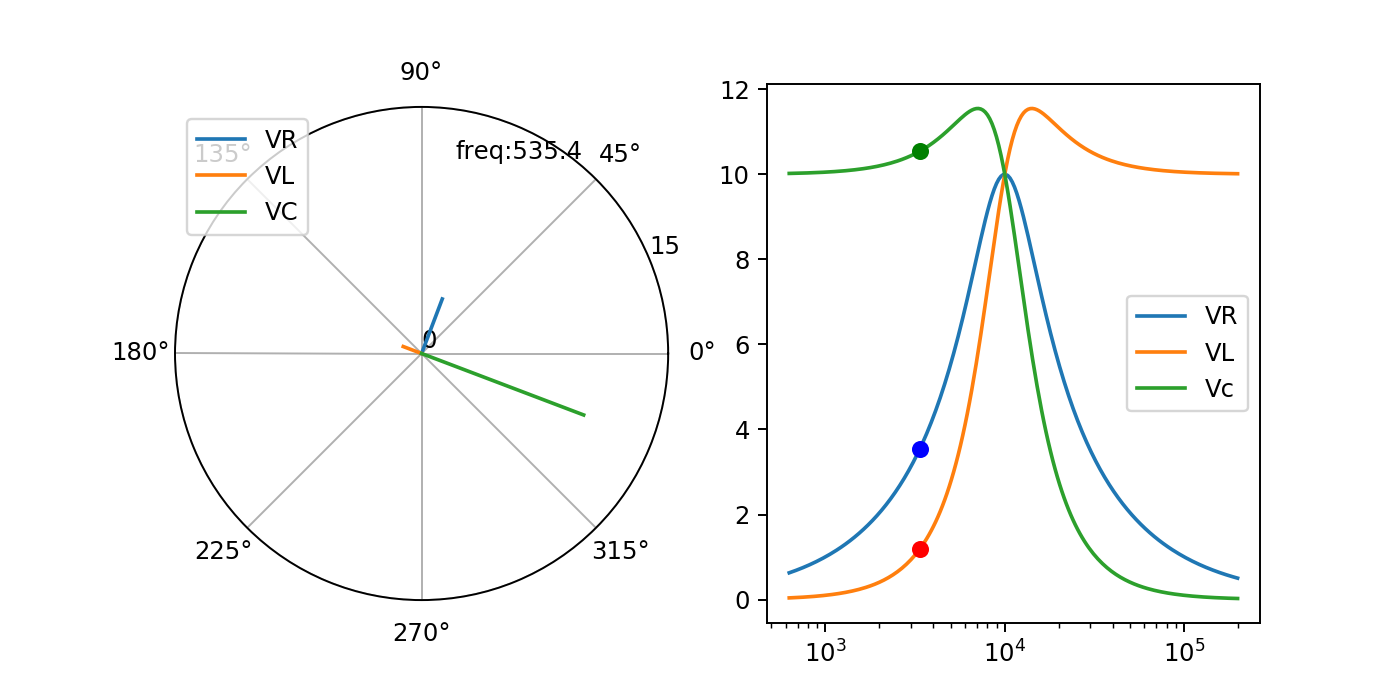

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

#theta = np.linspace(0 , 2 * np.pi, 1024)
R = 10
L = 1E-3
C = 10E-6
E = 10
fo = 1 /(2 * np.pi * (L*C)**0.5)
f= np.logspace(2,4.5, num=200)
print(fo)
w = 2*np.pi*f
XL = w*L
XC = 1/(w*C)
X = XL - XC
Z = (R**2 + X**2)**0.5
theta_Z = np.arctan(X/R)
I = E / Z
theta_I = -theta_Z
VR = I * R
VL = I * XL
VC = I * XC
theta_VR = theta_I
theta_VL = theta_I + np.pi/2
theta_VC = theta_I - np.pi/2

fig = plt.figure(figsize=(8,4))
ax = plt.subplot(121, polar=True)
ax2 = plt.subplot(122)



#line, = ax.plot(theta_VR, VR,theta_VL, VL,theta_VC, VC )
line1, = ax.plot([theta_VR[0],0],[VR[0],0],label='VR')
line2, = ax.plot([theta_VL[0],0],[VL[0],0],label='VL')
line3, = ax.plot([theta_VC[0],0],[VC[0],0],label='VC')
label = ax.text(80*3.14/180, 12, 'freq:0')
ax.legend(loc='upper left')
ax.set_rmax(15)
ax.set_yticks([0,15])

ax2.plot(w, VR, label='VR')
ax2.plot(w, VL, label='VL')
ax2.plot(w, VC, label='Vc')
ax2.legend()
ax2.set_xscale('log')
dot1, = ax2.plot([], [], 'o', color='blue') #初始畫點資料
dot2, = ax2.plot([], [], 'o', color='red')
dot3, = ax2.plot([], [], 'o', color='green')

def update(i):
    label.set_text('freq:'+str(np.round(f[i],1)))
    line1.set_xdata([theta_VR[i],0])
    line1.set_ydata([VR[i],0])
    line2.set_xdata([theta_VL[i],0])
    line2.set_ydata([VL[i],0])
    line3.set_xdata([theta_VC[i],0])
    line3.set_ydata([VC[i],0])
    dot1.set_data(w[i],VR[i])
    dot2.set_data(w[i],VL[i])
    dot3.set_data(w[i],VC[i])
    return line1,line2,line3,label

anim = FuncAnimation(fig, update, frames=200, blit=200, interval = 20)
#anim.save('rlc.gif', writer=PillowWriter(fps=20))

plt.show()


In [23]:
np.sign(-0.0)

0.0

<IPython.core.display.Javascript object>


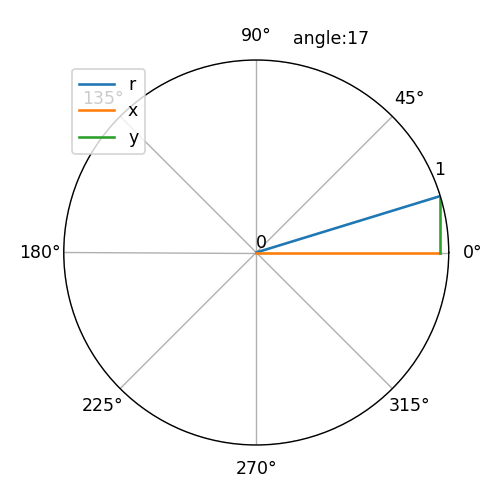

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

theta = np.linspace(0 , 2 * np.pi, 360)

r = 1 *np.ones(len(theta))
x = r * np.cos(theta)
y = r * np.sin(theta)

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111, polar=True)

#line, = ax.plot(theta_VR, VR,theta_VL, VL,theta_VC, VC )

line1, = ax.plot([],[],label='r')
line2, = ax.plot([],[],label='x')

line4, = ax.plot([],[],label='y')
label = ax.text(80*3.14/180, 1.1, 'freq:0')
ax.legend(loc='upper left')

ax.grid(True)
ax.set_rmax(1)
ax.set_yticks([0,1])
def update(i):
    label.set_text('angle:'+str(i))
    line1.set_xdata([theta[i],0])
    line1.set_ydata([r[i],0])
    line2.set_xdata([(1-np.sign(x[i]))*np.pi/2,0])
    line2.set_ydata([np.abs(x[i]),0])
    line4.set_xdata([theta[i],(1-np.sign(x[i]))*np.pi/2])
    line4.set_ydata([r[i],np.abs(x[i])])
    
    return line1,line2,line3,label

anim = FuncAnimation(fig, update, frames=360, blit=200, interval = 50)
#anim.save('圓.gif', writer=PillowWriter(fps=20))

plt.show()



<IPython.core.display.Javascript object>


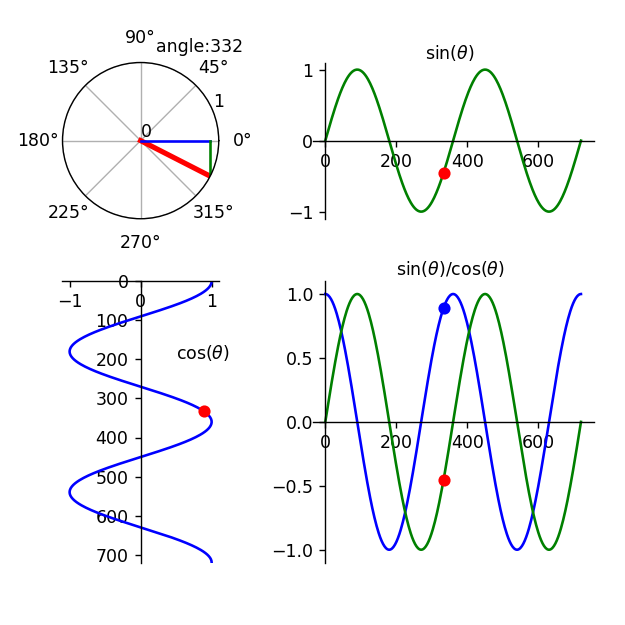

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

theta = np.linspace(0 , 4 * np.pi, 360)
degree = np.linspace(0,720, 360)
r = 1 *np.ones(len(theta))
x = r * np.cos(theta)
y = r * np.sin(theta)

fig = plt.figure(figsize=(5,5))
#ax = plt.subplot(221, polar=True)
#ax2 = plt.subplot(222)
#ax3 = plt.subplot(223)
ax = fig.add_axes([0.1, 0.65, 0.25, 0.25], frameon=True, polar=True)
ax2 = fig.add_axes([0.5, 0.65, 0.45, 0.25], frameon=True)
ax3 = fig.add_axes([0.1, 0.1, 0.25, 0.45], frameon=True)
ax4 = fig.add_axes([0.5, 0.1, 0.45, 0.45], frameon=True)
#line, = ax.plot(theta_VR, VR,theta_VL, VL,theta_VC, VC )

line1, = ax.plot([],[],'r',linewidth=3,label='r')
line2, = ax.plot([],[],'b',label='x')
line3, = ax.plot([],[],'g',label='y')
label = ax.text(80*3.14/180, 1.15, 'angle:0')
#ax.legend(loc='upper left')

ax2.plot(degree,y,'g')
ax2.text(280, 1.15, r'$\sin(\theta)$')
dot1, = ax2.plot([], [], 'o', color='red') #初始畫點資料

ax3.plot(x,degree,'b')
ax3.text(0.5, 200, r'$\cos(\theta)$')
dot2, = ax3.plot([], [], 'o', color='red') #初始畫點資料

ax4.plot(degree,x, 'b',label='cos(t)')
ax4.plot(degree,y, 'g',label='sin(t)')
ax4.text(200,1.15, r'$\sin(\theta)/\cos(\theta)$')
dot3, = ax4.plot([], [], 'o', color='blue') #初始畫點資料
dot4, = ax4.plot([], [], 'o', color='red') #初始畫點資料

ax.grid(True)
ax.set_rmax(1)
ax.set_yticks([0,1])

ax3.set_ylim([720,0])

ax2.spines['left'].set_position('zero')   # makee x and y axes go through
ax2.spines['bottom'].set_position('zero') # the origin
ax2.spines['right'].set_color('none')     # hide the unnecessary
ax2.spines['top'].set_color('none')       # spines ("the box" around the plot)

ax3.spines['left'].set_position('zero')   # makee x and y axes go through
ax3.spines['bottom'].set_position('zero') # the origin
ax3.spines['right'].set_color('none')     # hide the unnecessary
ax3.spines['top'].set_color('none')       # spines ("the box" around the plot)

ax4.spines['left'].set_position('zero')   # makee x and y axes go through
ax4.spines['bottom'].set_position('zero') # the origin
ax4.spines['right'].set_color('none')     # hide the unnecessary
ax4.spines['top'].set_color('none')       # spines ("the box" around the plot)

def update(i):
    label.set_text('angle:'+str(2*i))
    line1.set_xdata([theta[i],0])
    line1.set_ydata([r[i],0])
    line2.set_xdata([(1-np.sign(x[i]))*np.pi/2,0])
    line2.set_ydata([np.abs(x[i]),0])
    line3.set_xdata([theta[i],(1-np.sign(x[i]))*np.pi/2])
    line3.set_ydata([r[i],np.abs(x[i])])
    dot1.set_data(degree[i],y[i])
    dot2.set_data(x[i],degree[i])
    dot3.set_data(degree[i],x[i])
    dot4.set_data(degree[i],y[i])
    return line1,line2,line3,label

anim = FuncAnimation(fig, update, frames=360, blit=200, interval = 50)
#anim.save('generatingSine.gif', writer=PillowWriter(fps=20))


<IPython.core.display.Javascript object>


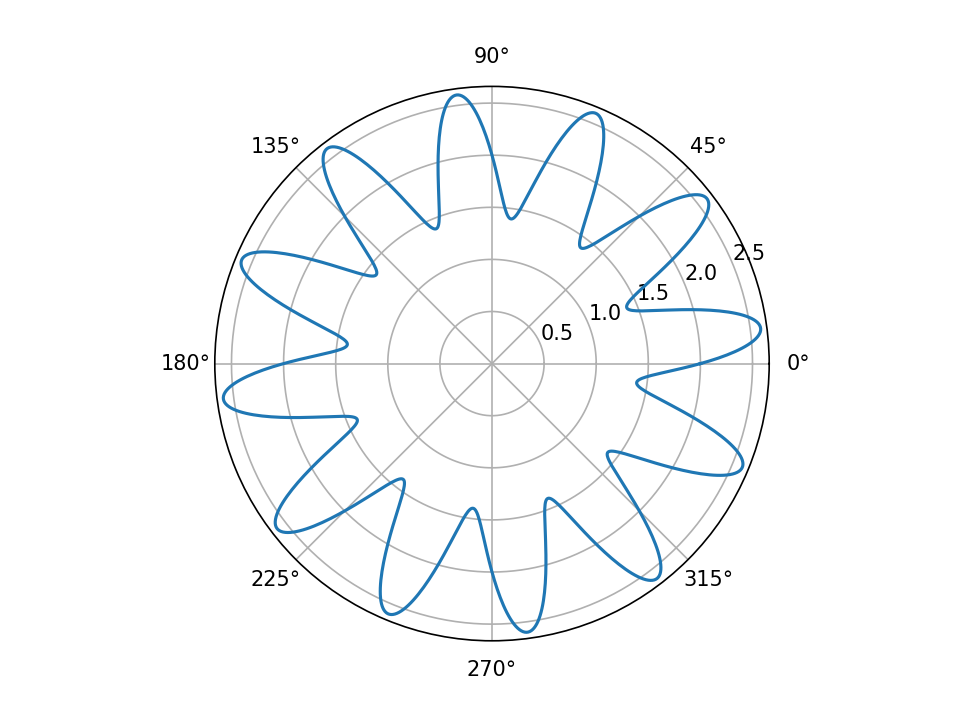

In [8]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0 , 2 * np.pi, 1024)
a = 2   # 變化中心點
b = 0.6 # 變化幅度
c = 12  # 花瓣數
R = a + b * np.sin(c * theta)
plt.axes(polar = True)
#plt.plot(theta, R)
plt.polar(theta, R)

In [50]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


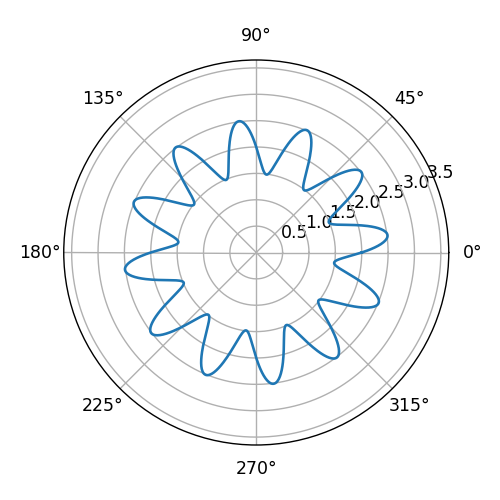

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

theta = np.linspace(0 , 2 * np.pi, 1024)
a = 2   # 變化中心點
b = 1.5 # 變化幅度
c = 12  # 花瓣數
R = a + b * np.sin(c * theta)
beta = np.linspace(0.20 ,1, 50)

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111, polar=True)
ax.set_rmax(4)
line, = ax.plot(theta, R)

#line, = ax.plot([],[])


def update(i):
    R = a + i * np.sin(c * theta)
    #line.set_xdata(theta)
    line.set_ydata(R)
    return line,

anim = FuncAnimation(fig, update, frames=beta, blit=True, interval = 50)
#anim.save('flower.gif', writer=PillowWriter(fps=20))

plt.show()